In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol',
    'Malic acid', 'Ash',
    'Alcalinity of ash', 'Magnesium',
    'Total phenols', 'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity', 'Hue',
    'OD280/OD315 of diluted wines',
    'Proline']

X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

C:\Users\wishw\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
label = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators = 10000,random_state=0,n_jobs = -1)
forest.fit(X_train,y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, label[f],importances[indices[f]]))

 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcalinity of ash              0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flavanoids                     0.060718
 8) Nonflavanoid phenols           0.032033
 9) Proanthocyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280/OD315 of diluted wines   0.014645
13) Proline                        0.013916


In [3]:
indices

array([ 9, 12,  6, 11,  0, 10,  5,  3,  1,  8,  4,  7,  2], dtype=int64)

In [4]:
importances

array([0.10658906, 0.02539968, 0.01391619, 0.03203319, 0.02207807,
       0.0607176 , 0.15094795, 0.01464516, 0.02235112, 0.18248262,
       0.07824279, 0.1319868 , 0.15860977])

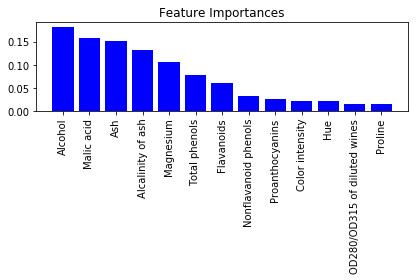

In [6]:
import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),importances[indices],color='blue',align='center')
plt.xticks(range(X_train.shape[1]),label, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()